In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df=pd.read_csv("AAPL.csv",parse_dates=["Date"],index_col=[0])
print(df.index.freq)
missing_dates = pd.date_range(start=df.index.min(), end=df.index.max()).difference(df.index)
print(missing_dates)
df.shape

None
DatetimeIndex(['2022-07-02', '2022-07-03', '2022-07-04', '2022-07-09',
               '2022-07-10', '2022-07-16', '2022-07-17', '2022-07-23',
               '2022-07-24', '2022-07-30',
               ...
               '2023-05-29', '2023-06-03', '2023-06-04', '2023-06-10',
               '2023-06-11', '2023-06-17', '2023-06-18', '2023-06-19',
               '2023-06-24', '2023-06-25'],
              dtype='datetime64[ns]', length=114, freq=None)


(251, 6)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-01,136.039993,139.039993,135.660004,138.929993,138.105347,71051600
2022-07-05,137.770004,141.610001,136.929993,141.559998,140.719742,73353800
2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071655,74064300
2022-07-07,143.289993,146.550003,143.279999,146.350006,145.481308,66253700
2022-07-08,145.259995,147.550003,145.000000,147.039993,146.167191,64547800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.970001,85069600


In [5]:
# Dropping the specified columns
df.drop(columns=["Open", "Close", "Adj Close", "Volume"], inplace=True)

# Calculate the midpoint of low and high and save it as 'Mid'
df["Mid"] = (df["Low"] + df["High"]) / 2

df

,High,Low,Mid
Date,,,
2022-07-01,139.039993,135.660004,137.349998
2022-07-05,141.610001,136.929993,139.269997
2022-07-06,144.119995,141.080002,142.599998
2022-07-07,146.550003,143.279999,144.915001
2022-07-08,147.550003,145.000000,146.275002
...,...,...,...
2023-06-26,188.050003,185.229996,186.639999
2023-06-27,188.389999,185.669998,187.029998
2023-06-28,189.899994,187.600006,188.750000


In [6]:
def train_test_split(data, prediction_size):
    train_size = int(len(data) * (1-prediction_size))
    train = pd.DataFrame(data[0:train_size])
    test = pd.DataFrame(data[train_size:len(data)])
    return train, test
df_train, df_test = train_test_split(df, 0.2)

In [7]:
print(df_train.shape)
print(df_test.shape)

(200, 3)
(51, 3)


In [8]:
# 归一化
scaler = MinMaxScaler(feature_range=(0,1))
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

In [9]:
df_train_scaled

array([[0.23294743, 0.23472945, 0.23048131],
       [0.28606872, 0.26067407, 0.27040227],
       [0.33794955, 0.34545465, 0.33964027],
       [0.38817708, 0.39039841, 0.38777422],
       [0.40884678, 0.42553633, 0.4160516 ],
       [0.39003727, 0.40061292, 0.39390787],
       [0.42744939, 0.42655784, 0.42592785],
       [0.38610999, 0.36670068, 0.37467504],
       [0.43778424, 0.38978556, 0.4124129 ],
       [0.47726344, 0.4909091 , 0.4837301 ],
       [0.49193905, 0.46026558, 0.47551725],
       [0.48491113, 0.46455582, 0.47416571],
       [0.53637878, 0.53524001, 0.53602241],
       [0.57461785, 0.5673137 , 0.57157718],
       [0.58929317, 0.59734439, 0.59424059],
       [0.56366262, 0.5742595 , 0.56960175],
       [0.52335677, 0.54402465, 0.53394323],
       [0.61099642, 0.57180812, 0.59216141],
       [0.61740397, 0.6177734 , 0.61877537],
       [0.74121559, 0.72175698, 0.73396408],
       [0.74038862, 0.75015328, 0.7479987 ],
       [0.71599854, 0.72441285, 0.72263238],
       [0.

In [10]:
df_test_scaled

array([[0.83484931, 0.84514806, 0.84385067],
       [0.82885491, 0.84555674, 0.84104369],
       [0.79950398, 0.82369784, 0.81515752],
       [0.78193492, 0.81144032, 0.80008321],
       [0.79661024, 0.80817161, 0.80580095],
       [0.77532047, 0.78917278, 0.7854247 ],
       [0.84311706, 0.83799809, 0.84437051],
       [0.86978114, 0.89295219, 0.88574707],
       [0.88218277, 0.90847811, 0.89988559],
       [0.88011599, 0.88600608, 0.88741032],
       [0.89189755, 0.87824328, 0.8893856 ],
       [0.81169902, 0.82002048, 0.8194198 ],
       [0.96176124, 0.95178754, 0.96195028],
       [0.95245994, 0.97936682, 0.97130685],
       [0.94605206, 0.96894813, 0.96278197],
       [0.95618034, 0.97507659, 0.97099482],
       [0.96775531, 0.9805925 , 0.97962359],
       [0.95680041, 0.9566906 , 0.96195028],
       [0.93923135, 0.96629226, 0.95799987],
       [0.93778431, 0.97303387, 0.96070279],
       [0.93344355, 0.94484173, 0.94417289],
       [0.9811908 , 0.98896848, 0.99064358],
       [1.

In [11]:
# def createXY(dataset,n_past):
#     dataX = []
#     dataY = []
#     for i in range(n_past, len(dataset)):
#             dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
#             dataY.append(dataset[i,0])
#     return np.array(dataX),np.array(dataY)

In [12]:
def generate_time_series_data(input_data, history_length):
    X_data, Y_data = [], []

    for idx in range(history_length, len(input_data)):
        X_data.append(input_data[idx-history_length :idx, 0:input_data.shape[1]])
#         Y_data.append(input_data[idx, 0:input_data.shape[1]]) #这是沿第二个维度（特征）的切片，从第一个特征开始，到最后一个特征结束。简而言之，我们选择了所有的特征。
        Y_data.append(input_data[idx, 0])
    return np.array(X_data), np.array(Y_data)

The main purpose of this function is to generate a data set for supervised learning from time series data, by using a sliding window method

In [13]:
#假设你只想预测第1、第3和第5个特征（记住，索引是从0开始的）
#Y_data.append(input_data[idx, [0, 2, 4]])

In [14]:
df_train_scaled.shape[1] #总共3列值

3

In [15]:
trainX,trainY=generate_time_series_data(df_train_scaled,5)
testX,testY=generate_time_series_data(df_test_scaled,5)

In [16]:
print("trainX Shape-- ",trainX.shape) #trainX consists of 1984 time Windows, each consisting of 30 consecutive time steps with 6 features per time step
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (195, 5, 3)
trainY Shape--  (195,)


In [17]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (46, 5, 3)
testY Shape--  (46,)


In [18]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.23294743 0.23472945 0.23048131]
 [0.28606872 0.26067407 0.27040227]
 [0.33794955 0.34545465 0.33964027]
 [0.38817708 0.39039841 0.38777422]
 [0.40884678 0.42553633 0.4160516 ]]

trainY[0]--  0.390037270982055


In [19]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [20]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,3)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [ 32, 64], # , 128, 256, 512
              'epochs' : [ 50, 100], # , 200
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 5)

C:\Users\eq220\AppData\Local\Temp\ipykernel_31476\3232944610.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [21]:
import numpy as np
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.optimizers import Adam


# 定义超参数空间
space  = [Integer(32, 256, name='lstm_neurons'),
          Real(0.1, 0.9, name='dropout_rate'),
          Real(1e-4, 1e-2, name='learning_rate', prior='log-uniform')]

# 定义优化目标函数
@use_named_args(space)
def objective(**params):
    # 在这里构建您的 LSTM 模型
    model = Sequential()
    model.add(LSTM(params['lstm_neurons'], input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse')
    
    history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY), verbose=0, shuffle=False)
    
    # 返回验证损失
    return history.history['val_loss'][-1]

# 执行贝叶斯优化
res = gp_minimize(objective, space, n_calls=50, random_state=0)

# 输出最佳参数
print("Best parameters: {}".format(res.x))


Best parameters: [123, 0.18371864917025651, 0.009148368555914988]


In [22]:
best_lstm_neurons = res.x[0]
best_dropout_rate = res.x[1]
best_learning_rate = res.x[2]

model = Sequential()
model.add(LSTM(best_lstm_neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(best_dropout_rate))
model.add(Dense(1))

optimizer = Adam(learning_rate=best_learning_rate)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY), verbose=1, shuffle=False)

Epoch 1/100
7/7 [==============================] - 1s 44ms/step - loss: 0.1097 - val_loss: 0.0041
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0269 - val_loss: 0.0478
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0099 - val_loss: 0.0024
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0073 - val_loss: 0.0144
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0067 - val_loss: 0.0024
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0056 - val_loss: 0.0075
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0066 - val_loss: 0.0018
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0060 - val_loss: 0.0039
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0055 - val_loss: 0.0029
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0064 - val_loss: 0.0029
Epoch 11/100
7/7 [==========

7/7 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 85/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 86/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 87/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 88/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 89/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 90/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 91/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 92/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 93/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 0.0015
Epoch 94/100
7/7 [===============

In [23]:
predictions = model.predict(testX)
print("predictions\n", predictions)
print("\nPredictions Shape-",predictions.shape)

2/2 [==============================] - 0s 3ms/step
predictions
 [[0.81610936]
 [0.7919206 ]
 [0.8591808 ]
 [0.88229805]
 [0.899634  ]
 [0.8849726 ]
 [0.89291024]
 [0.8187704 ]
 [0.98913836]
 [0.94233257]
 [0.9701264 ]
 [0.96443796]
 [0.9798766 ]
 [0.96197975]
 [0.9632934 ]
 [0.9640582 ]
 [0.94718057]
 [0.99934393]
 [1.0201261 ]
 [0.9885156 ]
 [0.96249586]
 [0.9464225 ]
 [0.97797173]
 [1.0022883 ]
 [1.0697787 ]
 [1.058311  ]
 [1.0833569 ]
 [1.1205525 ]
 [1.1362212 ]
 [1.0818529 ]
 [1.1122733 ]
 [1.0935012 ]
 [1.1557938 ]
 [1.1550122 ]
 [1.1817956 ]
 [1.1744256 ]
 [1.2245387 ]
 [1.2211683 ]
 [1.2247995 ]
 [1.1978478 ]
 [1.2360708 ]
 [1.2414632 ]
 [1.2539093 ]
 [1.2587552 ]
 [1.2966992 ]
 [1.3054191 ]]

Predictions Shape- (46, 1)


In [24]:
predictions_copies = np.repeat(predictions, 3, axis=-1)
inverse_transformed_datas = scaler.inverse_transform(predictions_copies)

In [25]:
predictions_copies

array([[0.81610936, 0.81610936, 0.81610936],
       [0.7919206 , 0.7919206 , 0.7919206 ],
       [0.8591808 , 0.8591808 , 0.8591808 ],
       [0.88229805, 0.88229805, 0.88229805],
       [0.899634  , 0.899634  , 0.899634  ],
       [0.8849726 , 0.8849726 , 0.8849726 ],
       [0.89291024, 0.89291024, 0.89291024],
       [0.8187704 , 0.8187704 , 0.8187704 ],
       [0.98913836, 0.98913836, 0.98913836],
       [0.94233257, 0.94233257, 0.94233257],
       [0.9701264 , 0.9701264 , 0.9701264 ],
       [0.96443796, 0.96443796, 0.96443796],
       [0.9798766 , 0.9798766 , 0.9798766 ],
       [0.96197975, 0.96197975, 0.96197975],
       [0.9632934 , 0.9632934 , 0.9632934 ],
       [0.9640582 , 0.9640582 , 0.9640582 ],
       [0.94718057, 0.94718057, 0.94718057],
       [0.99934393, 0.99934393, 0.99934393],
       [1.0201261 , 1.0201261 , 1.0201261 ],
       [0.9885156 , 0.9885156 , 0.9885156 ],
       [0.96249586, 0.96249586, 0.96249586],
       [0.9464225 , 0.9464225 , 0.9464225 ],
       [0.

In [32]:
pred=scaler.inverse_transform(predictions_copies)

In [33]:
pred

array([[167.25337, 164.11855, 165.51578],
       [166.08311, 162.93451, 164.35242],
       [169.33716, 166.2269 , 167.5873 ],
       [170.45558, 167.35849, 168.69913],
       [171.2943 , 168.20708, 169.5329 ],
       [170.58496, 167.48941, 168.82776],
       [170.969  , 167.87796, 169.20952],
       [167.38211, 164.24881, 165.64375],
       [175.62451, 172.58832, 173.8376 ],
       [173.36005, 170.29716, 171.58649],
       [174.70471, 171.65768, 172.92322],
       [174.4295 , 171.37924, 172.64964],
       [175.17642, 172.13495, 173.39217],
       [174.31058, 171.2589 , 172.53142],
       [174.37413, 171.3232 , 172.5946 ],
       [174.41113, 171.36064, 172.63138],
       [173.59459, 170.53448, 171.81966],
       [176.11826, 173.08788, 174.32845],
       [177.12369, 174.10516, 175.32796],
       [175.59438, 172.55783, 173.80765],
       [174.33556, 171.28416, 172.55624],
       [173.55792, 170.49738, 171.78319],
       [175.08426, 172.04172, 173.30055],
       [176.2607 , 173.23201, 174.

In [34]:
original_copies_array = np.repeat(testY,3, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),3)))

In [35]:
original

array([[165.279999  , 162.12193267, 163.55403827],
       [168.559998  , 165.44057573, 166.81471551],
       [169.850006  , 166.74578225, 168.09712435],
       [170.449997  , 167.35284218, 168.69358094],
       [170.350006  , 167.25167311, 168.59417896],
       [170.919998  , 167.82838061, 169.16081326],
       [167.039993  , 163.90266244, 165.30366453],
       [174.300003  , 171.24820791, 172.52090739],
       [173.850006  , 170.79290917, 172.07356123],
       [173.539993  , 170.47924368, 171.76537445],
       [174.029999  , 170.97502279, 172.25249393],
       [174.589996  , 171.54161753, 172.80919211],
       [174.059998  , 171.00537523, 172.28231621],
       [173.210007  , 170.14536987, 171.43733232],
       [173.139999  , 170.07453706, 171.36773672],
       [172.929993  , 169.86205682, 171.15896782],
       [175.240005  , 172.19928476, 173.45537205],
       [176.389999  , 173.36282767, 174.59859168],
       [174.710007  , 171.66304246, 172.92849615],
       [173.380005  , 170.31737

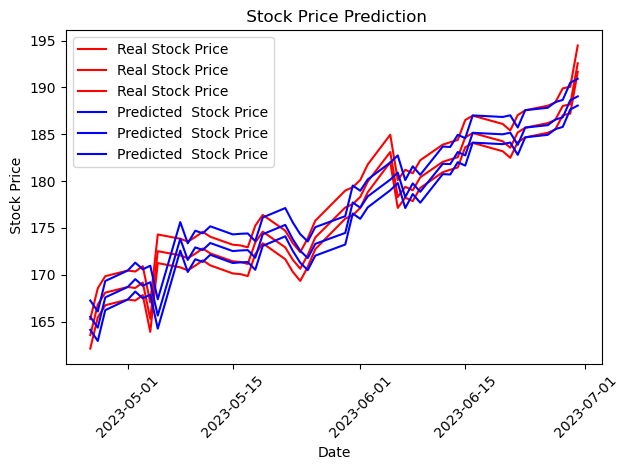

In [36]:
df_dates = df.index[-len(original):]
plt.plot(df_dates, original, color = 'red', label = 'Real Stock Price')
plt.plot(df_dates, pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel(' Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\eq220\Application\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\eq220\Application\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eq220\Application\Anaconda\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\eq220\Application\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise

Epoch 1/50


ValueError: in user code:

    File "C:\Users\eq220\Application\Anaconda\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\eq220\Application\Anaconda\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\eq220\Application\Anaconda\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\eq220\Application\Anaconda\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\eq220\Application\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\eq220\Application\Anaconda\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_91" is incompatible with the layer: expected shape=(None, 30, 3), found shape=(None, 5, 3)


In [37]:
grid_search.best_params_

{'batch_size': 32, 'epochs': 50, 'optimizer': 'adam'}

In [ ]:
my_model=grid_search.best_estimator_.model

In [ ]:
my_model

In [ ]:
model.save("my_model.h5")
from tensorflow.keras.models import load_model

loaded_model = load_model("my_model.h5")

In [ ]:
prediction=my_model.predict(testX)

In [ ]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

In [ ]:
# scaler.inverse_transform(prediction)

In [ ]:
prediction_copies = np.repeat(prediction, 3, axis=-1)
inverse_transformed_data = scaler.inverse_transform(prediction_copies)

In [ ]:
# prediction_copies_array = np.repeat(prediction, 6, axis=-1)

In [ ]:
prediction_copies.shape

In [ ]:
prediction_copies

In [ ]:
pred=scaler.inverse_transform(prediction_copies)[:,:]

In [ ]:
# pred_high=scaler.inverse_transform(prediction_copies)[:,1]

In [ ]:
# pred_high

In [ ]:
pred

In [ ]:
# pred=scaler.inverse_transform(np.reshape(prediction_copies,(len(prediction),6)))[:,0]
# 这是一个数组切片操作，用于选择重塑并进行逆变换后的数组的第一列
# 虽然 prediction_copies_array 有6列，但你只对第一列（索引为0的列）感兴趣

In [ ]:
original_copie_array = np.repeat(testY,3, axis=-1)

original_copie_array.shape

original=scaler.inverse_transform(np.reshape(original_copie_array,(len(testY),3)))[:,0]

In [ ]:
# # original_copies_array = np.repeat(testY,3, axis=-1)

# original_copies_array.shape

# original=scaler.inverse_transform(np.reshape(testY,(len(testY),3)))

In [ ]:
# original_high=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),6)))[:,1]

In [ ]:
# original_high

In [ ]:
original

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_dates = df.index[-len(original):]

In [ ]:
plt.plot(df_dates, original, color = 'red', label = 'Real Stock Price')
plt.plot(df_dates, pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel(' Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_30_days_past=df.iloc[-30:,:]

In [ ]:
df_30_days_past

# END!!!!